# Quantum state preparation GHZ

Update $\theta$ until it equivalent to GHZ state.

<img src='../../images/binho_checkstate.png' width = 500px/>

It looks like W state case:

<img src='../../images/check_ghz_state.png'/>

First, we import library

In [2]:
import qiskit, sys
sys.path.insert(1, '../../')
import qtm.base, qtm.constant, qtm.ansatz, qtm.qcompilation, qtm.state

Then, using compiler to optimize $\theta$

In [3]:
num_qubits = 3
num_layers = 1
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_linear_ansatz(num_qubits, num_layers),
    vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func='loss_fubini_study'
)

compiler.fit(num_steps=100)

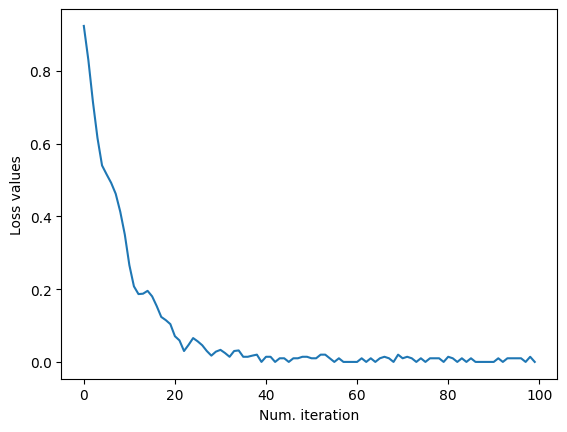

In [4]:
compiler.plot()

Finally, we can compare origin density matrix ($V$) and reconstructed density matrix ($U(\theta^*)$)

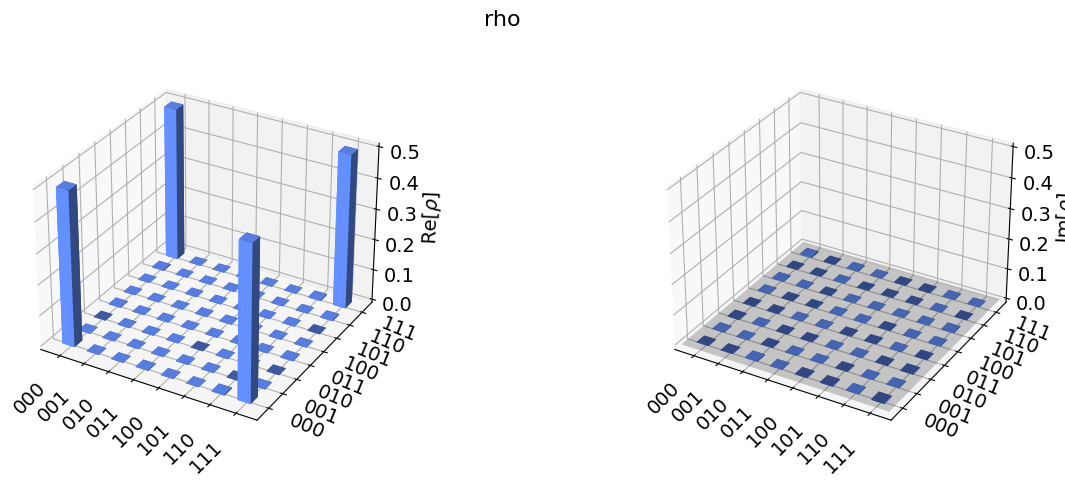

In [11]:
qc = compiler.u.bind_parameters(compiler.thetas)
rho = qiskit.quantum_info.DensityMatrix.from_instruction(qc)
sigma = qiskit.quantum_info.DensityMatrix.from_instruction(compiler.vdagger.inverse())
qiskit.visualization.plot_state_city(rho, title = 'rho')

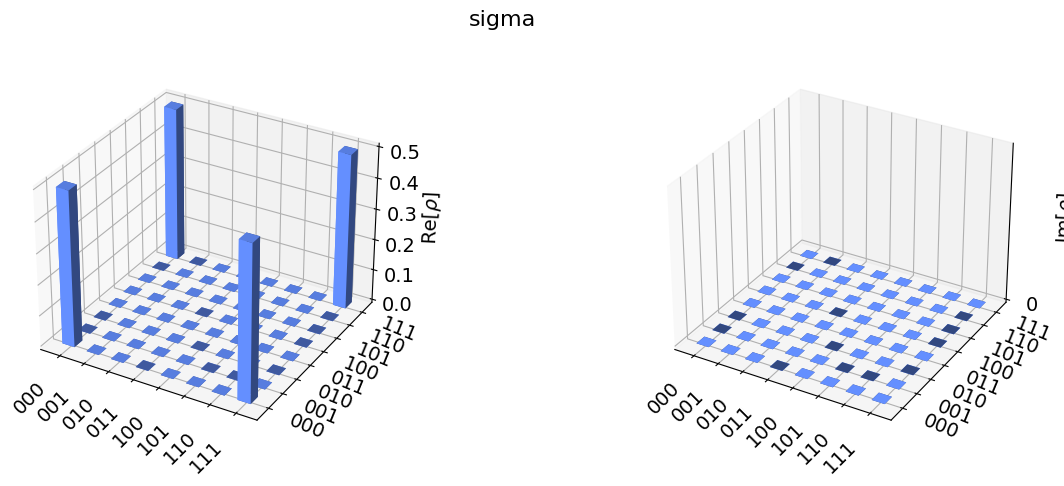

In [12]:
qiskit.visualization.plot_state_city(sigma, title = 'sigma')